# Introduction to AI

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f5y9ezDXqQ5uS6QRZPwSuQ.png" alt="AI Image" width="600"/>

## AI vs. ML vs. DL vs. Generative AI

**Artificial Intelligence (AI)**
The broad field of building systems that perform tasks that normally require human intelligence (reasoning, planning, perception). Methods can be rule-based or learning-based.

* Traffic-aware navigation (Google Maps/Waze)
* game NPC behavior
* smart-home automation rules

**Machine Learning (ML)**
A subset of AI where models learn patterns from data to make predictions or decisions without being explicitly programmed with rules.

* Email spam filtering
* credit-card fraud detection
* product/movie recommendations

**Deep Learning (DL)**
A subset of ML that uses deep neural networks to learn representations, especially effective on unstructured data (images, audio, text) and large datasets.

* Face unlock on phones
* speech-to-text dictation
* photo auto-tagging in galleries

**Generative AI**
Models that create new content (text, images, audio, code) by learning the data distribution; often built on deep learning architectures (e.g., transformers, diffusion)

* ChatGPT
* Stable Diffusion/Midjourney (images)
* GitHub Copilot (code suggestions)

## Types of machine learning:

**Supervised Learning**
Models learn from labeled data (inputs X with known targets y) to predict labels for new, unseen data. Two common tasks:
- Classification: predict discrete categories (spam vs. not spam, disease vs. no disease).
- Regression: predict continuous values (house prices, sales/demand forecasting).

**Unsupervised Learning**
Models discover structure in unlabeled data (no targets y). Common tasks:
- Clustering: group similar items (customer segmentation, document grouping).
- Dimensionality reduction: compress/visualize data (PCA, t-SNE/UMAP for 2D plots).
- Anomaly detection: identify outliers without labels (fraud or defect detection).

## Machine Learning Introduction

In [1]:
!uv add scikit-learn

Resolved 114 packages in 1ms
Audited 110 packages in 9ms


### First machine learning model:

First we need a dataset for us to use in some examples. For this first example we are going to use the "Iris Dataset".

This dataset is well known in the ML community and can help to introduce people to some ML aspects.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

<table>
    <tr>
        <th>Iris Setosa</th>
        <th>Iris Versicolor</th>
        <th>Iris Virginica</th>
    </tr>
    <tr>
        <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/250px-Irissetosa1.jpg"> </td>
        <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/250px-Blue_Flag%2C_Ottawa.jpg"> </td>
        <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/250px-Iris_virginica_2.jpg"> </td>
    </tr>
</table>

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
import pandas as pd

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now we can use this dataset to classify the Iris flower based on Sepal and Petal characteristics

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

print(f"Accuracy of the model: {accuracy_score(y, model.predict(X)) * 100}%")

Accuracy of the model: 100.0%


<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*0Pqqx6wGDfFm_7GLebg2Hw.png">

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)

# pretty print confusion matrix
cm = confusion_matrix(y, y_pred)
cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
cm_df


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


<img src="https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/09/confusion-matrix.jpg?resize=1024%2C576&ssl=1" style="width: 800px;">

### Understanding classification models:

We can plot the decision boundaries to understand how a classification models works

In [7]:
!uv add mlxtend

Resolved 114 packages in 1ms
Audited 110 packages in 8ms


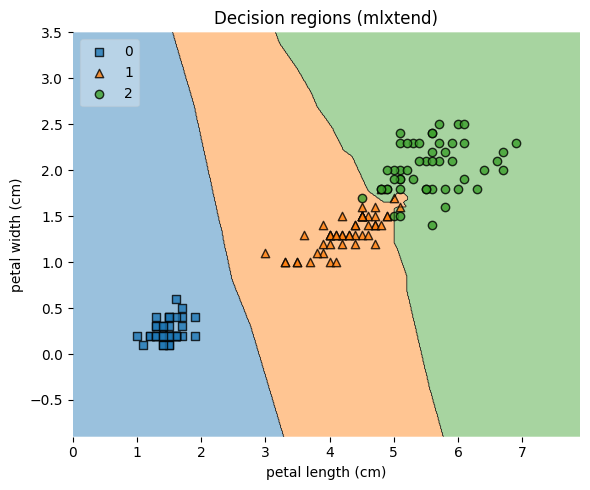

In [8]:
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

# Using only two features to be able to plot the decision regions
feat_idx = [2, 3]
X2 = X[:, feat_idx]

clf = KNeighborsClassifier(n_neighbors=3).fit(X2, y)

plt.figure(figsize=(6, 5))
plot_decision_regions(X2, y, clf=clf, legend=2)
plt.xlabel(iris.feature_names[feat_idx[0]])
plt.ylabel(iris.feature_names[feat_idx[1]])
plt.title("Decision regions (mlxtend)")
plt.tight_layout()


as you can see, the models are drawing lines between different classes. These lines are the decision boundaries and every side of a decision boundary represents a class.

## The distribution of samples is important!

<Axes: title={'center': 'Iris target distribution'}, xlabel='target'>

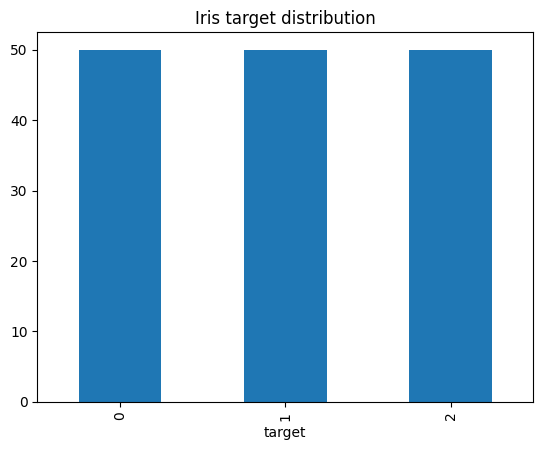

In [9]:
df['target'].value_counts().plot(kind='bar', title='Iris target distribution')

We have a good distribution of samples. We have 50 samples of every class and our model is performing pretty well, but what happens if we reduce the amount of samples in one of the classes?

<Axes: title={'center': 'Iris target distribution (imbalanced)'}, xlabel='target'>

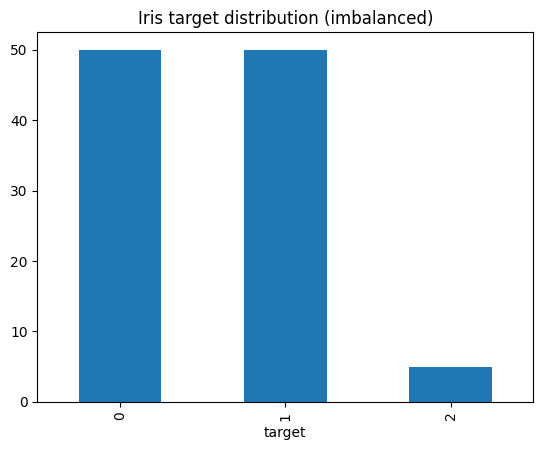

In [10]:
# we need to drop 45 samples from class 2
df_dropped = df[df['target'] == 2].index[:45]
df_imbalanced = df.drop(df_dropped)
df_imbalanced['target'].value_counts().plot(kind='bar', title='Iris target distribution (imbalanced)')

In [11]:
X = df_imbalanced[iris.feature_names].values
y = df_imbalanced['target'].values

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

print(f"Accuracy of the model: {accuracy_score(y, model.predict(X)) * 100}%")

Accuracy of the model: 99.04761904761905%


In [12]:
predicted = model.predict(df.loc[df_dropped, iris.feature_names].values)

print(f"Accuracy on dropped samples: {accuracy_score([2]*45, predicted) * 100}%")

Accuracy on dropped samples: 71.11111111111111%


We have a reduced accuracy.

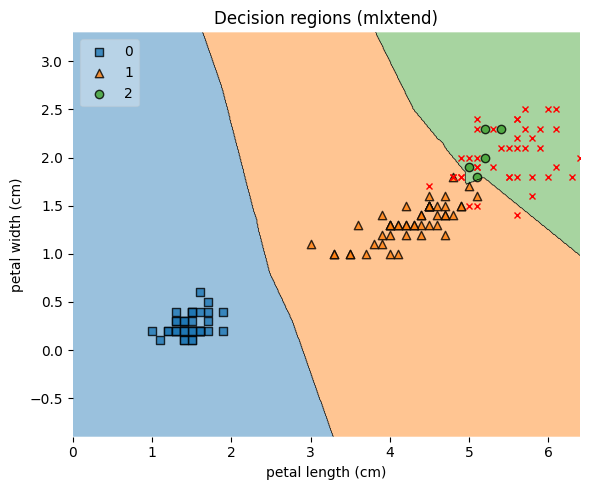

In [13]:
# Using only two features to be able to plot the decision regions
feat_idx = [2, 3]
X2 = X[:, feat_idx]

X_dropped = df.iloc[df_dropped, feat_idx].values

clf = KNeighborsClassifier(n_neighbors=3).fit(X2, y)

plt.figure(figsize=(6, 5))
plot_decision_regions(X2, y, clf=clf, legend=2)

plt.plot(X_dropped[:, 0], X_dropped[:, 1], 'rx', markersize=5, label='Dropped samples')

plt.xlabel(iris.feature_names[feat_idx[0]])
plt.ylabel(iris.feature_names[feat_idx[1]])
plt.title("Decision regions (mlxtend)")
plt.tight_layout()


Even the decision boundaries are different, Can you see how many dropped values are being misclassified?

## Augmentation

Sometimes we don't have enough samples of a class, or our entire dataset is too small to create an interesting model. So we do what we call augmentation: We extend or dataset creating samples, from existing data.

A good example of image augmentation is when we create new images, for our existing data source. We can zoom, crop, rotate, change colors, scale, ....

<img src="https://lh7-us.googleusercontent.com/docsz/AD_4nXfo8YoRFMnqkTvhX_SfxM5PymXbfEUEGmlSyIWZ5Fkz3AXgLDq_alfuG_hX1gEWL6hdC6yNXv6PEDte0pOalV1bLWmGp81ZHciqqQQY3ffl4-ilsezFciCVFmk76t50zTLcinw0BrLPEaGaqL6_umK1zFAh?key=CLtlcbGlvXdetPCu8wVgJQ">

<br><br><br><br><br>

**We are going to augment our dataset from previous example to try to enhance the performance of the unbalanced model:**

In [53]:
# Add noise in the dataset for class 2

import numpy as np

df_remaining = df_imbalanced[df_imbalanced['target'] == 2].copy()
df_augmented = df_remaining.sample(n=45, replace=True, random_state=42)
df_augmented[iris.feature_names] += np.random.normal(0.0, 0.2, df_augmented[iris.feature_names].shape)

df_augmented.shape


(45, 5)

In [54]:
df_augmented = pd.concat([df_imbalanced, df_augmented], ignore_index=True).reset_index()

df_augmented.shape

(150, 6)

In [55]:
X = df_augmented[iris.feature_names].values
y = df_augmented['target'].values

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

print(f"Accuracy of the model: {accuracy_score(y, model.predict(X)) * 100}%")


Accuracy of the model: 97.33333333333334%


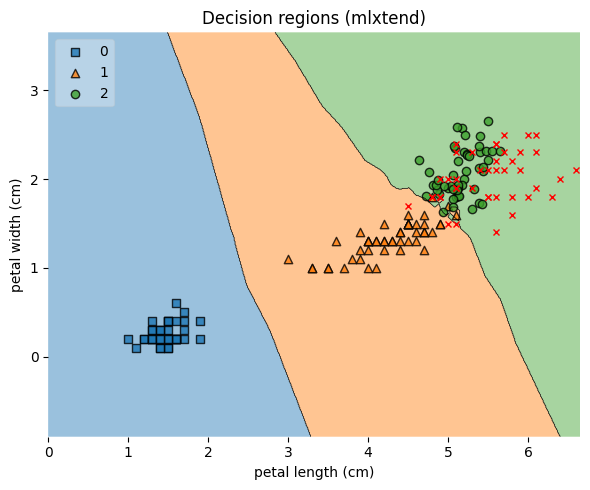

In [57]:
# Using only two features to be able to plot the decision regions
feat_idx = [2, 3]
X2 = X[:, feat_idx]

clf = KNeighborsClassifier(n_neighbors=3).fit(X2, y)

plt.figure(figsize=(6, 5))
plot_decision_regions(X2, y, clf=clf, legend=2)

plt.plot(X_dropped[:, 0], X_dropped[:, 1], 'rx', markersize=5, label='Dropped samples')

plt.xlabel(iris.feature_names[feat_idx[0]])
plt.ylabel(iris.feature_names[feat_idx[1]])
plt.title("Decision regions (mlxtend)")
plt.tight_layout()


### Classification of handwritten digits

Digits: (1797, 64) (1797,)


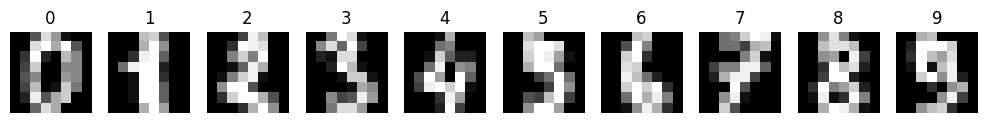

In [14]:
from sklearn.datasets import load_digits

X_dig, y_dig = load_digits(return_X_y=True)
print("Digits:", X_dig.shape, y_dig.shape)

digits = load_digits()
fig, axes = plt.subplots(1, 10, figsize=(10, 1.2))

for ax, img, lbl in zip(axes, digits.images[:10], y_dig[:10]):
    ax.imshow(img, cmap="gray")
    ax.set_title(lbl)
    ax.axis("off")

plt.tight_layout()

In [15]:
# Lets identify if the digit is a 9 or not
from sklearn.model_selection import train_test_split

y_binary = (y_dig == 9).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_dig, y_binary, test_size=0.5, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f"Model accuracy: {accuracy_score(y_test, y_pred) * 100}%")

Model accuracy: 98.10901001112346%


The metrics are looking good, but is it really good?

In [16]:
y_pred = [0] * len(y_test)

print(f"Baseline accuracy: {accuracy_score(y_test, y_pred) * 100}%")

Baseline accuracy: 89.76640711902112%


Even if we predict every sample as "not a 9", we still get nearly 90% accuracy. This can be misleading—the model is not performing well.

Therefore, we should not rely solely on accuracy.

In [17]:
scores = model.predict_proba(X_test)[:, 1]
print(scores[:10])

[4.26840948e-10 9.99996359e-01 1.22443893e-06 3.36048806e-03
 6.22745835e-13 3.19812954e-09 1.03224349e-06 2.02509243e-07
 2.70173535e-10 2.08905318e-23]


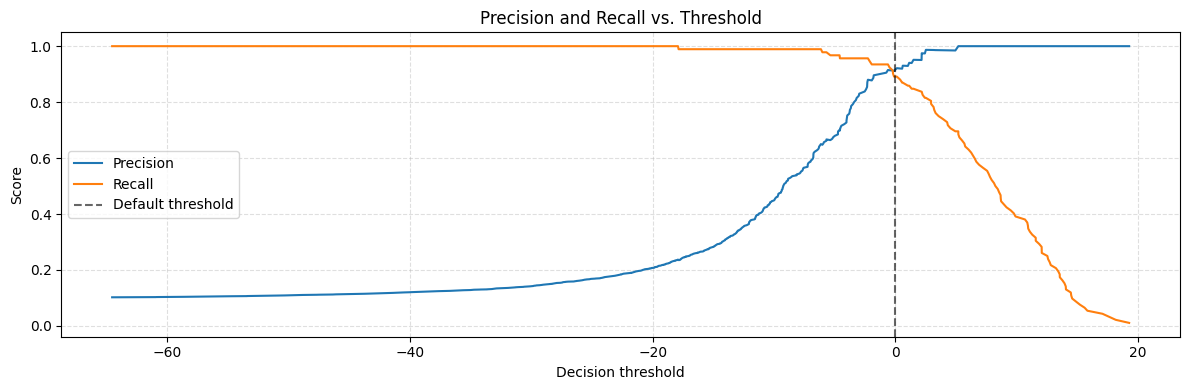

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

try:
    scores = model.decision_function(X_test)
    default_thr = 0.0
except AttributeError:
    scores = model.predict_proba(X_test)[:, 1]
    default_thr = 0.5

precision, recall, thresholds = precision_recall_curve(y_test, scores)
ap = average_precision_score(y_test, scores)

fig = plt.figure(figsize=(12, 4))


plt.plot(thresholds, precision[:-1], label="Precision", color="#1f77b4")
plt.plot(thresholds, recall[:-1], label="Recall", color="#ff7f0e")
plt.axvline(default_thr, color="k", ls="--", alpha=0.6, label="Default threshold")
plt.xlabel("Decision threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid(True, ls="--", alpha=0.4)

plt.tight_layout()

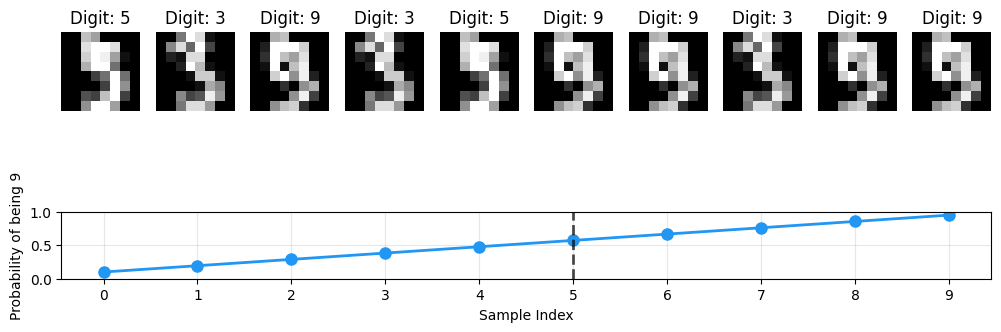

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sample_digits = [5, 3, 9, 3, 5, 9, 9, 3, 9, 9]
sample_indices = []
for digit in sample_digits:
    idx = np.where(y_dig == digit)[0][0]
    sample_indices.append(idx)


fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(2, len(sample_digits), height_ratios=[3, 1], hspace=0.3)


for i, (idx, digit) in enumerate(zip(sample_indices, sample_digits)):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(digits.images[idx], cmap="gray")
    ax.set_title(f"Digit: {digit}")
    ax.axis("off")


ax_prob = fig.add_subplot(gs[1, :])


x_positions = np.arange(len(sample_digits))
probabilities = np.linspace(0.1, 0.95, len(sample_digits))
threshold = 5


ax_prob.plot(x_positions, probabilities, 'o-', linewidth=2, markersize=8, color='#2196F3')

ax_prob.axvline(threshold, color='black', linestyle='--', linewidth=2, alpha=0.7, label=f'Threshold = {threshold}')

ax_prob.set_xlabel('Sample Index')
ax_prob.set_ylabel('Probability of being 9')
ax_prob.set_ylim(0, 1)
ax_prob.set_xticks(x_positions)
ax_prob.grid(True, alpha=0.3)

plt.show()

This chart is representing the accuracy vs recall trade off.

In this case we have a model to identify if the digit is a 9. If we move our threshold line to the right we are eliminating the false positives, but also increasing our false negatives (reduce recall). If we move our threshold line to the left, we increase the true positives, but we also increase the false positives (reduce accuracy).

Basically we are always trying to find the best balance between recall and accuracy for every model and use case.

## Dimensionality reduction

This is a type of unsupervised model. Sometimes our dataset has too many features, and it is helpful to reduce this dimensionality to simplify the model, reduce computation resources spent to run the model and make easier to analyse the correlation between features.

In [60]:
X_dig[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [64]:
# Feature extraction with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_dig)
X_pca.shape

(1797, 10)

In [65]:
X_pca[0]

array([ -1.25946645, -21.27488348,   9.46305462, -13.01418869,
         7.12882278,   7.44065876,  -3.25283716,  -2.55347036,
         0.58184214,  -3.62569695])

In [66]:
y_binary = (y_dig == 9).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_binary, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f"Model accuracy: {accuracy_score(y_test, y_pred) * 100}%")

Model accuracy: 96.21802002224695%
